# CIA coefficient

In [1]:
from exojax.spec.rtransfer import nugrid
nus,wav,res=nugrid(5000,50000,1000,unit="AA")
from exojax.spec import contdb
cdbH2H2=contdb.CdbCIA('.database/H2-H2_2011.cia',nus)

xsmode assumes ESLOG in wavenumber space: mode=lpf
H2-H2


/home/kawahara/anaconda3/lib/python3.8/site-packages/exojax-1.1.3-py3.8.egg/exojax/spec/check_nugrid.py:16: UserWarning: Resolution may be too small. R=433.86018742134854
  warnings.warn('Resolution may be too small. R=' + str(resolution),


logacia can provide an absorption coeffcient as a function of temperature

In [2]:
from exojax.spec.hitrancia import logacia
import jax.numpy as jnp
Tfix=jnp.array([1000.0,1300.0,1600.0])
lc=logacia(Tfix,nus,cdbH2H2.nucia,cdbH2H2.tcia,cdbH2H2.logac)

plotting... 

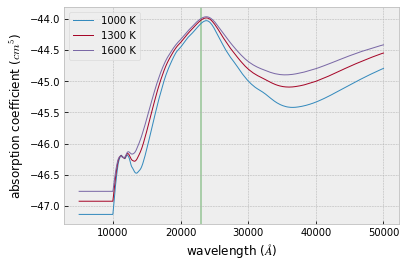

In [3]:
import matplotlib.pyplot as plt
import seaborn
plt.style.use('bmh')
for i in range(0,len(Tfix)):
    plt.plot(wav[::-1],lc[i,:],lw=1,label=str(int(Tfix[i]))+" K")
plt.axvspan(22876.0,23010.0,alpha=0.3,color="green")
plt.xlabel("wavelength ($\\AA$)")
plt.ylabel("absorption coefficient ($cm^5$)")
plt.legend()
plt.savefig("cia.png")

In [4]:
#max value
import numpy as np
1.e8/nus[np.argmax(lc[1,:])]

23858.80474469375